<a href="https://colab.research.google.com/github/muhammadsajad/100_Days_of_Deep_Learning/blob/main/Xavier_Glorat_And_He_Weight_Initialization_in_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
# Making directory for uploading kaggle api
!mkdir -p /root/.kaggle

In [2]:
# Upload manualy your kaggle api to directory and copy it to the root/.kaggle direcotry
!cp kaggle.json /root/.kaggle/

In [3]:
!kaggle datasets download -d hafeezabro/ushape

Dataset URL: https://www.kaggle.com/datasets/hafeezabro/ushape
License(s): unknown
  0% 0.00/2.68k [00:00<?, ?B/s]
100% 2.68k/2.68k [00:00<00:00, 6.42MB/s]


In [4]:
# As the downloaded dataset in zip format we have to unzip it in content folder
!unzip /content/ushape.zip -d /content/

Archive:  /content/ushape.zip
  inflating: /content/ushape.csv     


In [7]:
df = pd.read_csv('/content/ushape.csv')

In [8]:
df.head()

,3.159499363321345566e-02,9.869877579082642072e-01,0.000000000000000000e+00
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


In [9]:
df.columns

Index(['3.159499363321345566e-02', '9.869877579082642072e-01',
       '0.000000000000000000e+00'],
      dtype='object')

In [10]:
df.columns=['X','Y','class']

In [11]:
df.head()

,X,Y,class
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


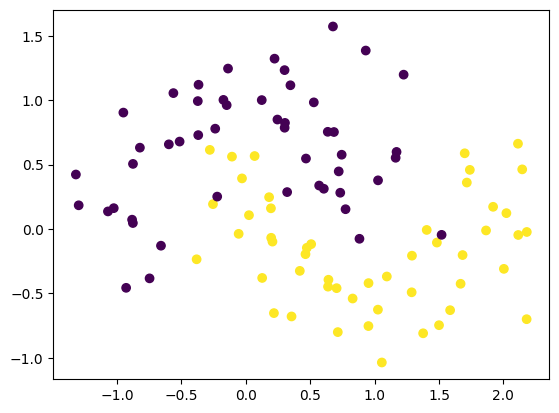

In [12]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [13]:
X=df.iloc[:,0:2].values
y=df.iloc[:,-1].values

In [14]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

# Xavier
# Remember you have to apply Xavier initialization only on **tnah**

In [28]:
model=Sequential()

model.add(Dense(10,activation='tanh',input_dim=2))
model.add(Dense(10,activation='tanh'))
model.add(Dense(10,activation='tanh'))
model.add(Dense(10,activation='tanh'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.get_weights()

[array([[-0.00715083,  0.0882678 ,  0.4187731 , -0.47587937, -0.62081784,
          0.41775805,  0.5265549 , -0.5315346 , -0.5449515 , -0.2408748 ],
        [-0.1217975 ,  0.21237862,  0.2981146 , -0.07232398,  0.44533855,
         -0.53895265,  0.36768955, -0.25094873,  0.14274985, -0.31765506]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 2.0605832e-01,  1.0004407e-01,  1.2253016e-01,  2.0974350e-01,
         -3.7433708e-01, -5.7574093e-02, -2.6918340e-01, -1.9615862e-01,
         -1.0942781e-01,  3.6013961e-01],
        [-8.2383960e-02,  3.4548944e-01, -1.7593887e-01,  1.2642765e-01,
          8.7999880e-02, -3.0845019e-01, -2.4288052e-01,  5.1346576e-01,
         -4.0598828e-01,  7.8597426e-02],
        [ 1.9799167e-01,  5.0994217e-01,  3.7010056e-01,  3.1198663e-01,
         -1.5930206e-01, -4.7817561e-01, -8.6769611e-02, -5.2369022e-01,
         -3.3049789e-01,  3.9291382e-04],
        [ 3.7664765e-01,  2.7631265e-01,  2.48611

In [30]:
initial_weights = model.get_weights()

In [31]:
initial_weights[0] = np.random.randn(2,10)*np.sqrt(1/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(10,1)*np.sqrt(1/10)
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [32]:
model.set_weights(initial_weights)

In [33]:
model.get_weights()

[array([[-0.07103076, -0.8303272 , -0.86350083,  0.20074663, -0.5095788 ,
          0.10809764, -0.09215812,  0.09207705,  0.5411802 ,  0.44763577],
        [-0.12416829, -0.49851158,  0.06778758, -0.37462834, -0.8861242 ,
         -0.00520722, -0.19866599, -1.7640009 , -0.49744776, -0.8548839 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.39793077,  0.00943021,  0.2500902 ,  0.05930926,  0.38606992,
         -0.16096145,  0.21673952,  0.6048053 , -0.37023202, -0.13535543],
        [ 0.6117923 ,  0.14444076,  0.41611654,  0.0431786 , -0.22668827,
          0.03894372,  0.118298  ,  0.18469338,  0.01815204,  0.1828094 ],
        [ 0.11048508, -0.2319235 , -0.30677626, -0.18448359,  0.39796406,
         -0.10172822,  0.06448463, -0.06934179,  0.29984382,  0.6040715 ],
        [ 0.15891843,  0.42012522,  0.13685901,  0.37967265,  0.31432897,
         -0.1178062 ,  0.02589144,  0.18759218, -0.5954723 ,  0.19235162],
        [ 0.26424

In [34]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [35]:
hittory=model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 140ms/step - accuracy: 0.2004 - loss: 0.7440 - val_accuracy: 0.1500 - val_loss: 0.7308
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.1848 - loss: 0.7254 - val_accuracy: 0.3500 - val_loss: 0.7095
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.3013 - loss: 0.7126 - val_accuracy: 0.6000 - val_loss: 0.6886
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5510 - loss: 0.6924 - val_accuracy: 0.7000 - val_loss: 0.6680
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6368 - loss: 0.6761 - val_accuracy: 0.8500 - val_loss: 0.6479
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7367 - loss: 0.6624 - val_accuracy: 0.8500 - val_loss: 0.6283
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8011 - loss: 0.6426 - val_accuracy: 0.9000 - val_loss: 0.6087
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8162 - loss: 0.6307 - val_accuracy: 0.9000 - val_loss

In [36]:
model.get_weights()

[array([[-0.08629251, -0.92174935, -0.9094866 ,  0.11072287, -0.566195  ,
          0.16785234,  0.02594887,  0.22116034,  0.5244001 ,  0.46862397],
        [-0.06043858, -0.5127589 ,  0.06013675, -0.25803867, -0.797262  ,
         -0.11293934, -0.22868001, -1.7383575 , -0.6207667 , -0.77416724]],
       dtype=float32),
 array([ 0.14975916, -0.15337642,  0.14885944,  0.15681897,  0.03262574,
         0.00474377, -0.0122563 ,  0.04657267, -0.05576725, -0.1287305 ],
       dtype=float32),
 array([[-0.494969  ,  0.0771614 ,  0.3490562 ,  0.08447538,  0.47930256,
         -0.11466902,  0.19041388,  0.55464256, -0.27834558, -0.01267208],
        [ 0.6994163 ,  0.10692839,  0.44544122,  0.08972333, -0.25534055,
          0.11661655,  0.17388846,  0.12661853,  0.01914122,  0.10017704],
        [ 0.16311254, -0.25712326, -0.30136055, -0.12367451,  0.39297813,
         -0.04779537,  0.13066177, -0.06894827,  0.27402344,  0.56583154],
        [ 0.08486325,  0.50449955,  0.22126909,  0.2847364 , 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step


<Axes: >

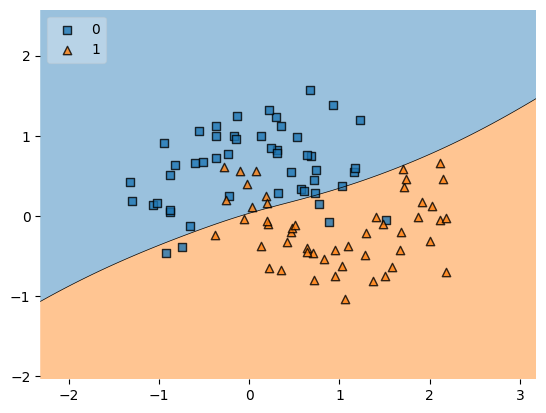

In [37]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'),clf=model,legend=2)

# He weight initialization
# Remember if you are working with **Relu** you should use He weights initialization

# Now initializing these weights uisng these heuristics techniques in keras

In [39]:
model=Sequential()

model.add(Dense(10,activation='relu',input_dim=2,kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                     │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
model.get_weights()

[array([[ 1.3914328 ,  0.6587581 ,  0.6389319 , -0.33597687,  2.0399039 ,
          0.90415233,  0.8280304 , -1.1007285 ,  0.645484  ,  0.02456737],
        [ 0.54391384, -2.0262938 ,  0.54008096, -1.778965  , -0.27740437,
          0.3337127 ,  1.033485  , -1.315389  , -1.420512  , -0.31032476]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.05663532, -0.5564733 ,  0.7361044 , -0.33019906, -0.32362974,
          0.91651857, -0.4149964 ,  0.4549537 , -0.04125264, -0.05904778],
        [ 0.19221562, -0.45716643,  0.577655  ,  0.22608599,  0.54459625,
          0.52321935,  0.00590971,  0.2221944 ,  0.14443013, -0.13234349],
        [-0.35025302,  0.74424535,  0.16981405, -0.4488721 , -0.22892705,
         -0.06867012, -0.20094901,  0.45666465, -0.26004606, -0.6652031 ],
        [-0.52481955, -0.35821864,  0.30188096, -0.00980297,  0.3501924 ,
         -0.24850897,  0.3963468 ,  0.2615226 , -0.6856444 ,  0.32010815],
        [ 0.41987

In [42]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [43]:
history=model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 141ms/step - accuracy: 0.3900 - loss: 1.1324 - val_accuracy: 0.4000 - val_loss: 1.0662
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4535 - loss: 1.0459 - val_accuracy: 0.4000 - val_loss: 1.0247
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4559 - loss: 1.0250 - val_accuracy: 0.4000 - val_loss: 0.9900
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4520 - loss: 0.9594 - val_accuracy: 0.4000 - val_loss: 0.9575
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4730 - loss: 0.9503 - val_accuracy: 0.4500 - val_loss: 0.9255
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4481 - loss: 0.9030 - val_accuracy: 0.4500 - val_loss: 0.8951
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4725 - loss: 0.8626 - val_accuracy: 0.4500 - val_loss: 0.8683
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4427 - loss: 0.8728 - val_accuracy: 0.5000 - val_loss

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step


<Axes: >

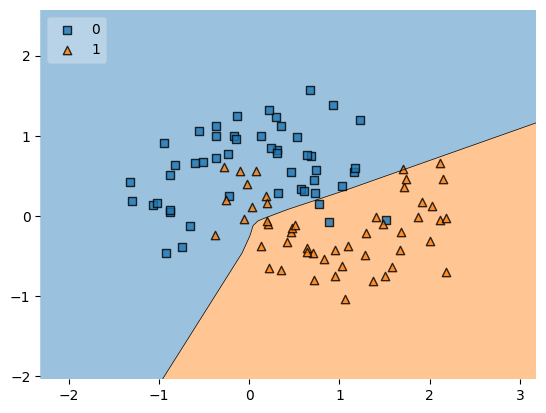

In [46]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'),clf=model,legend=2)